# Modes of Variability

This notebook provides an overview of running the modes of variability module. More information can be found in the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/variability_mode). Example parameter files are located in the [PMP sample setups](https://github.com/PCMDI/pcmdi_metrics/tree/master/sample_setups/pcmdi_parameter_files/variability_modes).

## Environment

The modes of variability metric requires two additional packages that are not part of the standard PMP install: [eofs](https://ajdawson.github.io/eofs/latest/) and [scipy](https://www.scipy.org/). If those are not already part of your environment, you can edit the following cell to install them in the jupyter notebook kernel. Delete the triple quotations from lines 2&5 to install with conda:

In [1]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [2]:
# for pip
"""
import sys
!{sys.executable} -m pip install eofs scipy
"""

'\nimport sys\n!{sys.executable} -m pip install eofs scipy\n'

## Usage

Modes of variability can be run on the command line or with using a parameter file

Available modes: NAM, NAO, SAM, PNA, PDO  
Available seasons: DJF, MAM, JJA, SON, monthly, yearly  
ConvEOF = True  # Calculate conventioanl EOF for model  
CBF = True  # Calculate Common Basis Function (CBF) for model  

For help, type:  
```
variability_modes_driver.py --help
```

In [1]:
%%bash
python ../../../pcmdi_metrics/variability_mode/variability_modes_driver.py --help

usage: variability_modes_driver.py [-h] [--parameters PARAMETERS]
                                   [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                   [--results_dir RESULTS_DIR]
                                   [--reference_data_path REFERENCE_DATA_PATH]
                                   [--modpath MODPATH] [--mip MIP] [--exp EXP]
                                   [--frequency FREQUENCY] [--realm REALM]
                                   [--reference_data_name REFERENCE_DATA_NAME]
                                   [-v VARIABILITY_MODE]
                                   [--seasons SEASONS [SEASONS ...]]
                                   [--modnames MODNAMES [MODNAMES ...]]
                                   [-r REALIZATION] [--modpath_lf MODPATH_LF]
                                   [--varOBS VAROBS] [--varModel VARMODEL]
                                   [--eofn_obs EOFN_OBS] [--eofn_mod EOFN_MOD]
                                   [--osyear

## Basic example

In [2]:
%%bash
python ../../../pcmdi_metrics/variability_mode/variability_modes_driver.py -p basic_mov_param.py --case_id "mov_1"

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: False False
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0', 'CanCM4']
number of models: 2
realization:  r1i1p1
parallel: False
demo_output/mov_1
demo_output/mov_1
demo_output/mov_1


CDMS I/O error: Determining type of file /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_data/PCMDIobs2_clims; must specify dictionary (control) file
Traceback (most recent call last):
  File "/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/cdms2/dataset.py", line 1275, in __init__
    _fileobj_ = Cdunif.CdunifFile(path, mode)
OSError: No error

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "../../../pcmdi_metrics/variability_mode/variability_modes_driver.py", line 275, in <module>
    obs_timeseries, osyear, oeyear = read_data_in(
  File "/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/pcmdi_metrics-v1.2.1_471_g9a49d77-py3.8.egg/pcmdi_metrics/variability_mode/lib/lib_variability_mode.py", line 49, in read_data_in
  File "/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/cdms2/dataset.py", line 506, in openDataset
    file1 = CdmsFile(pat

CalledProcessError: Command 'b'python ../../../pcmdi_metrics/variability_mode/variability_modes_driver.py -p basic_mov_param.py --case_id "mov_1"\n'' returned non-zero exit status 1.

## Observations settings

Some variable to discuss:
varOBS = 'psl'  
ObsUnitsAdjust = (True, 'divide', 100.0)  # Pa to hPa; or (False, 0, 0)  

osyear = 1900  
oeyear = 2005  
eofn_obs = 1  

In [ ]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_2" --mip "cmip6"

## Model Settings

In [ ]:
%%bash
variability_modes_driver.py -p basic_mov_param.py \
--case_id "mov_3"
--varModel psl \
--ModUnitsAdjust "True, 'divide', 100.0" \
--msyear 1900 \
--meyear 2005 \
--eofn_mod 1

## Graphics

In [ ]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --plot True --case_id "mov_4"

In [ ]:
# open and display one of the graphics

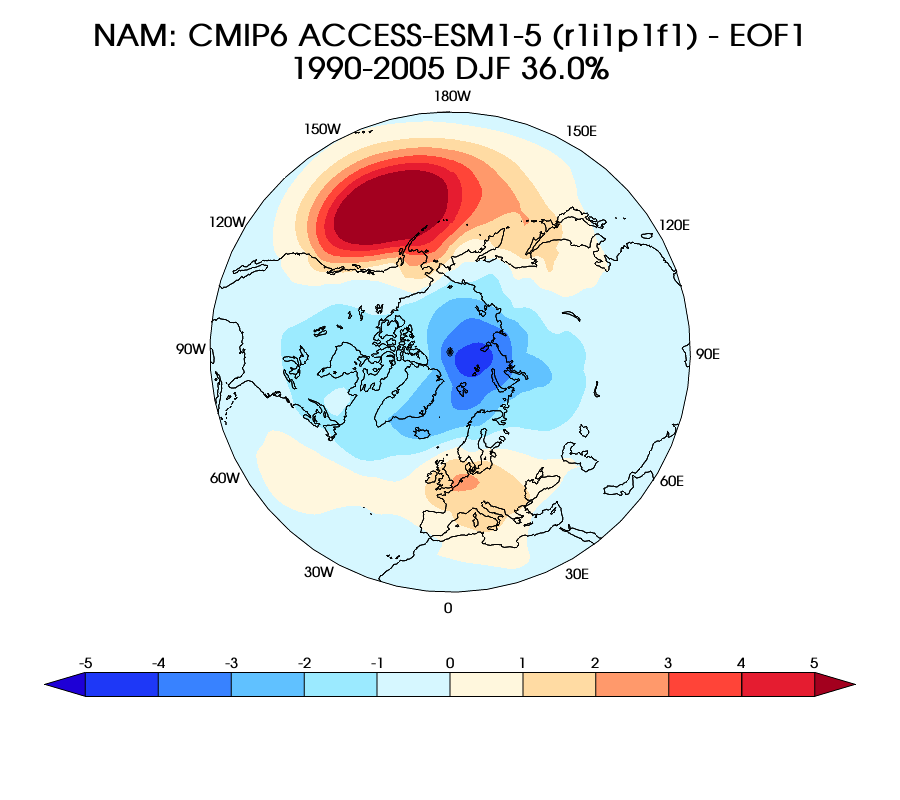

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "demo_mov/mov_4/NAM_psl_EOF1_DJF_cmip6_ACCESS-ESM1-5_historical_r1i1p1f1_mo_atm_1990-2005.png")

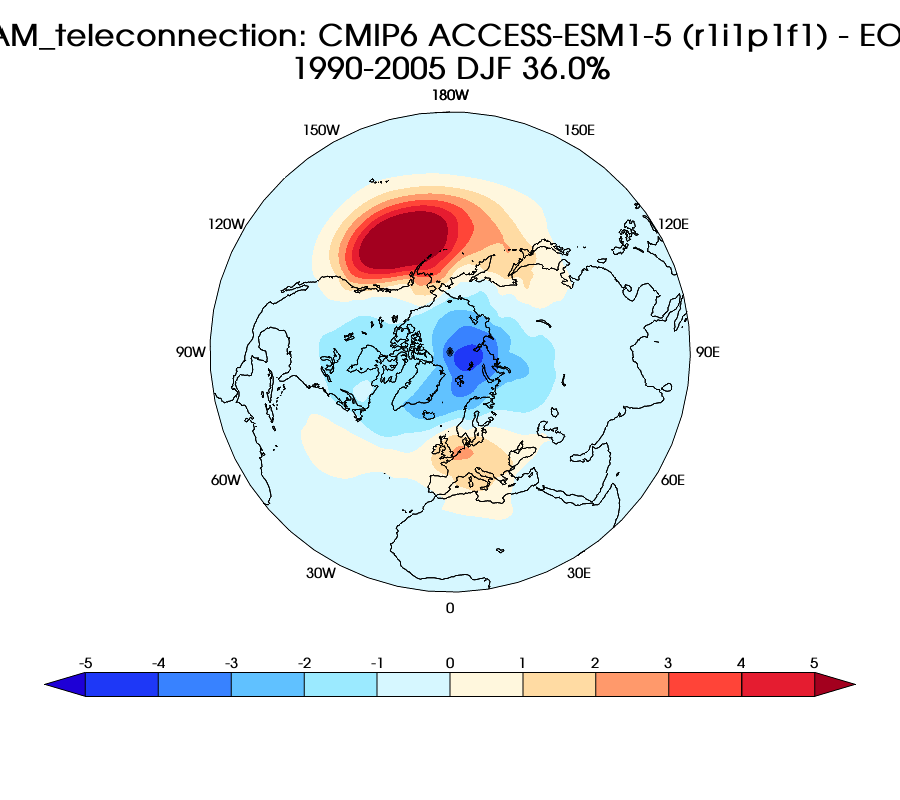

In [3]:
Image(filename = 'demo_mov/mov_4/NAM_psl_EOF1_DJF_cmip6_ACCESS-ESM1-5_historical_r1i1p1f1_mo_atm_1990-2005_teleconnection.png')